# Tutorial 1: MuCoST for intestine

## import MuCoST

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import scanpy as sc
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
from MuCoST.mucost import training_model
from MuCoST.utils import mclust
from MuCoST.config import set_arg

## hyperparameter setting

In [2]:
opt = set_arg()
arg = opt.parse_args(['--mode_his', 'noh'])
arg.n_domain=10
arg.temp=0.05
arg

Namespace(seed=2023, latent_dim=50, epoch=1000, lr=0.001, weight_decay=0.0, log_step=10, drop_feat_p=0.2, flow='source_to_target', radius=150, rknn=6, knn=6, n_domain=10, temp=0.05, n_refine=25, mode_his='noh', mode_rknn='rknn')

## reading data

In [3]:
# import cv2

# # 读取原始高分辨率图像
# original_image = cv2.imread('Data/intestine/disease/spatial/colon_d14_rotated.tif')

# # 获取比例因子
# tissue_lowres_scalef = 0.06701664

# # 计算低分辨率图像的尺寸
# lowres_width = int(original_image.shape[1] * tissue_lowres_scalef)
# lowres_height = int(original_image.shape[0] * tissue_lowres_scalef)

# # 缩放图像到低分辨率大小
# lowres_image = cv2.resize(original_image, (lowres_width, lowres_height))

# # 保存低分辨率图像
# cv2.imwrite('Data/intestine/disease/spatial/tissue_lowres_image.png', lowres_image)

In [4]:
section_id = 'control'
input_dir = os.path.join('Data/intestine', section_id)
adata = sc.read_visium(path=input_dir, count_file='filtered_feature_bc_matrix.h5')
# img=cv2.imread(input_dir + "/spatial/full_image.tif")
# adata.uns['image']=img
adata

/home/zl/anaconda3/envs/pyg/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zl/anaconda3/envs/pyg/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 2604 × 31053
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

## showing ground truth

In [5]:
# Ann_df = pd.read_csv(os.path.join('Data/1-DLPFC_annotations', section_id+'_truth.txt'), sep='\t', header=None, index_col=0)
# Ann_df.columns = ['Ground Truth']
# adata.obs['Ground Truth'] = Ann_df.loc[adata.obs_names, 'Ground Truth']
# plt.rcParams["figure.figsize"] = (5, 5)
# sc.pl.spatial(adata, img_key="hires", color=["Ground Truth"])

## training model

Average spatial edge: 5.448540706605223
Average feature edge: 6.0


  0%|          | 0/1000 [00:00<?, ?it/s]

EP[ 100]: loss=0.8366.
EP[ 200]: loss=0.8123.
EP[ 300]: loss=0.7993.
EP[ 400]: loss=0.7907.
EP[ 500]: loss=0.7841.
EP[ 600]: loss=0.7798.
EP[ 700]: loss=0.7762.
EP[ 800]: loss=0.7736.
EP[ 900]: loss=0.7731.
EP[1000]: loss=0.7698.


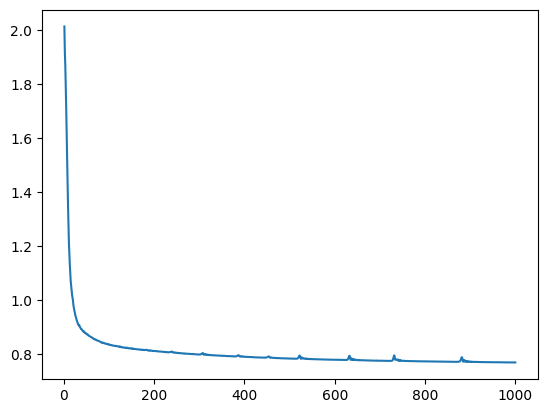

In [6]:
training_model(adata, arg)

## clustering with muclust

In [7]:
adata = mclust(adata, arg, refine=False)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.1
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


## computing ARI

In [8]:
# adata = adata[~pd.isnull(adata.obs['Ground Truth'])]
# obs_df = adata.obs.dropna()
# ARI = adjusted_rand_score(obs_df['mclust'], obs_df['Ground Truth'])
# print('Adjusted rand index = %.4f' %ARI)

## NMI

In [9]:
# from sklearn.metrics.cluster import normalized_mutual_info_score
# nmi = normalized_mutual_info_score(obs_df['mclust'], obs_df['Ground Truth'])
# nmi

## Homogeneity score

In [10]:
# from sklearn.metrics import homogeneity_score
# homogeneity = homogeneity_score( obs_df['Ground Truth'],obs_df['mclust'])
# homogeneity

## Completeness score

In [11]:
# from sklearn.metrics import completeness_score
# completeness = completeness_score(obs_df['Ground Truth'],obs_df['mclust'])
# completeness

## V_measure score

In [12]:
# from sklearn.metrics import v_measure_score
# v_measure = v_measure_score(obs_df['Ground Truth'],obs_df['mclust'])
# v_measure 

## Compactness score

## UMAP visualization

/home/zl/anaconda3/envs/pyg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zl/anaconda3/envs/pyg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


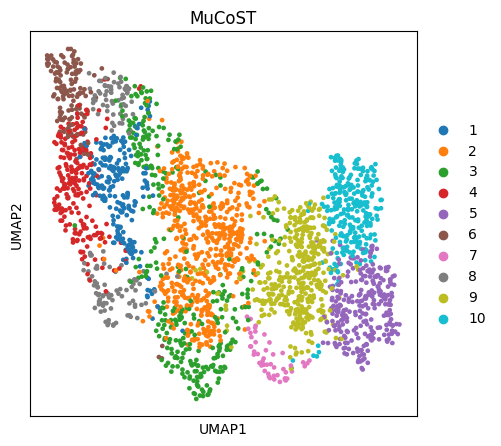

In [13]:
sc.pp.neighbors(adata, use_rep='MuCoST')
sc.tl.umap(adata)
plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(adata, color=["mclust"], title=['MuCoST'])

## heatmap of density

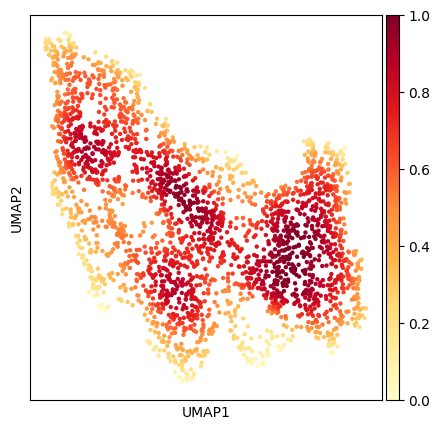

In [14]:
plt.rcParams["figure.figsize"] = (5, 5)
sc.tl.embedding_density(adata, basis='umap')
sc.pl.embedding_density(adata, basis='umap',fg_dotsize=40)

In [15]:
# plt.rcParams["figure.figsize"] = (5, 5)
# sc.tl.embedding_density(adata, basis='umap', groupby='Ground Truth')
# sc.pl.embedding_density(adata, basis='umap', groupby='Ground Truth')

## spatial architectures

/home/zl/anaconda3/envs/pyg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


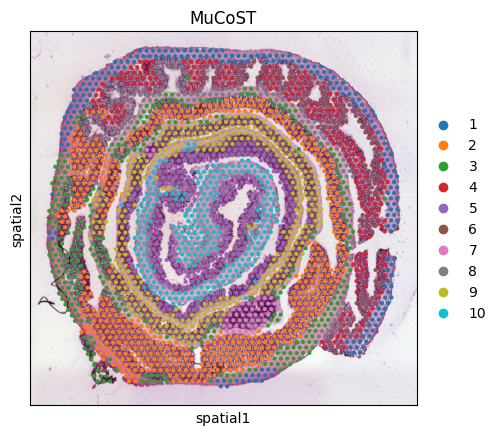

In [16]:
plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.spatial(adata, color=["mclust"], title=['MuCoST'])

## paga trajectory inference

In [17]:
# adata = adata[adata.obs['Ground Truth'].notna(),:]
# sc.tl.paga(adata,groups='Ground Truth')
# plt.rcParams["figure.figsize"] = (5,5)
# sc.pl.paga_compare(adata, legend_fontsize=10, frameon=False, size=50,
#                    title=section_id+'-MoCoST', legend_fontoutline=2, show=False)